# Linear Regression for Concrete Compressive Strength Prediction

### Imports and Data Loading

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load and prepare data
def load_concrete_data():
    df = pd.read_excel('concrete_data.xls')
    X = df.drop(columns=['Concrete compressive strength(MPa, megapascals) '])
    y = df['Concrete compressive strength(MPa, megapascals) ']
    return X, y

X, y = load_concrete_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2]:
X.describe()  # Display summary statistics of the features

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000


Linear regression models are not sensitive to the scale of the features, so we can use the raw data without scaling. In addition, there seem to be no categorical features/missing data. Preprocessing is not needed.

In [3]:
model = LinearRegression()

model.fit(X_train, y_train)  # Train the model
y_pred = model.predict(X_test)  # Make predictions

### Evaluation Metrics

In [4]:
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)

print("Root mean squared error:", root_mean_squared_error(y_test, y_pred))
print("R^2 score:", r2_score(y_test, y_pred))

Model coefficients: [ 0.11897516  0.10851781  0.08216854 -0.13571192  0.30873202  0.01780436
  0.02406104  0.11644448]
Model intercept: -28.63573935657601
Root mean squared error: 9.796707832398448
R^2 score: 0.6275416055429018


As we can see, model performance is not very good. The R2 score being around 0.62 indicates that the model is able to explain only 62% of the variance in the target variable. This suggests that there may be other factors influencing concrete compressive strength that a linear model is not able to capture. The RMSE of 9.79 indicates that the model's predictions are off by an average of about 9.79 MPa, which is significant given that the target variable ranges from 2 to 82 MPa.

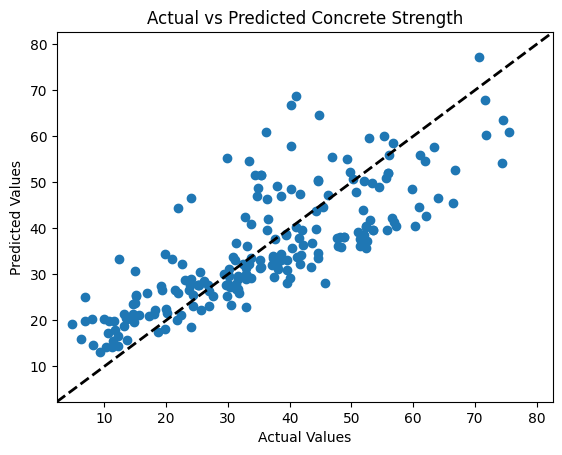

In [5]:
# plotting predictions vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Concrete Strength')

plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlim(y.min(), y.max())
plt.ylim(y.min(), y.max())
plt.show()

Our initial ideas was to attempt this more simple model and view its results to prove our hypothesis that the linear regression model would be very weak for this dataset without preprosessing or other factors that can help improve it. This model also served as our baseline for future comparisions to other models.